In [119]:
import pandas as pd

# Load all the datasets
consumption_20 = pd.read_csv('20-consumption-data.csv')
production_20 = pd.read_csv('20-production-data.csv')

consumption_50 = pd.read_csv('50-consumption-data.csv')
production_50 = pd.read_csv('50-production-data.csv')

consumption_100 = pd.read_csv('100-consumption-data.csv')
production_100 = pd.read_csv('100-production-data.csv')

consumption_200 = pd.read_csv('200-consumption-data.csv')
production_200 = pd.read_csv('200-production-data.csv')

# Check for missing values in all datasets
print("Checking for missing values in consumption and production data:")
print(consumption_20.isnull().sum(), production_20.isnull().sum())
print(consumption_50.isnull().sum(), production_50.isnull().sum())
print(consumption_100.isnull().sum(), production_100.isnull().sum())
print(consumption_200.isnull().sum(), production_200.isnull().sum())

# Fill missing values if necessary
consumption_20.fillna(method='ffill', inplace=True)
production_20.fillna(method='ffill', inplace=True)
consumption_50.fillna(method='ffill', inplace=True)
production_50.fillna(method='ffill', inplace=True)
consumption_100.fillna(method='ffill', inplace=True)
production_100.fillna(method='ffill', inplace=True)
consumption_200.fillna(method='ffill', inplace=True)
production_200.fillna(method='ffill', inplace=True)


Checking for missing values in consumption and production data:
Day 1      0
Day 2      0
Day 3      0
Day 4      0
Day 5      0
          ..
Day 361    0
Day 362    0
Day 363    0
Day 364    0
Day 365    0
Length: 365, dtype: int64 Day 1      0
Day 2      0
Day 3      0
Day 4      0
Day 5      0
          ..
Day 361    0
Day 362    0
Day 363    0
Day 364    0
Day 365    0
Length: 365, dtype: int64
Day 1      0
Day 2      0
Day 3      0
Day 4      0
Day 5      0
          ..
Day 361    0
Day 362    0
Day 363    0
Day 364    0
Day 365    0
Length: 365, dtype: int64 Day 1      0
Day 2      0
Day 3      0
Day 4      0
Day 5      0
          ..
Day 361    0
Day 362    0
Day 363    0
Day 364    0
Day 365    0
Length: 365, dtype: int64
Day 1      0
Day 2      0
Day 3      0
Day 4      0
Day 5      0
          ..
Day 361    0
Day 362    0
Day 363    0
Day 364    0
Day 365    0
Length: 365, dtype: int64 Day 1      0
Day 2      0
Day 3      0
Day 4      0
Day 5      0
          ..
Day 361    0


In [120]:
# Aggregating the data by calculating the mean of energy consumption and production across homes
mean_consumption_20 = consumption_20.mean(axis=0)
mean_production_20 = production_20.mean(axis=0)

mean_consumption_50 = consumption_50.mean(axis=0)
mean_production_50 = production_50.mean(axis=0)

mean_consumption_100 = consumption_100.mean(axis=0)
mean_production_100 = production_100.mean(axis=0)

mean_consumption_200 = consumption_200.mean(axis=0)
mean_production_200 = production_200.mean(axis=0)


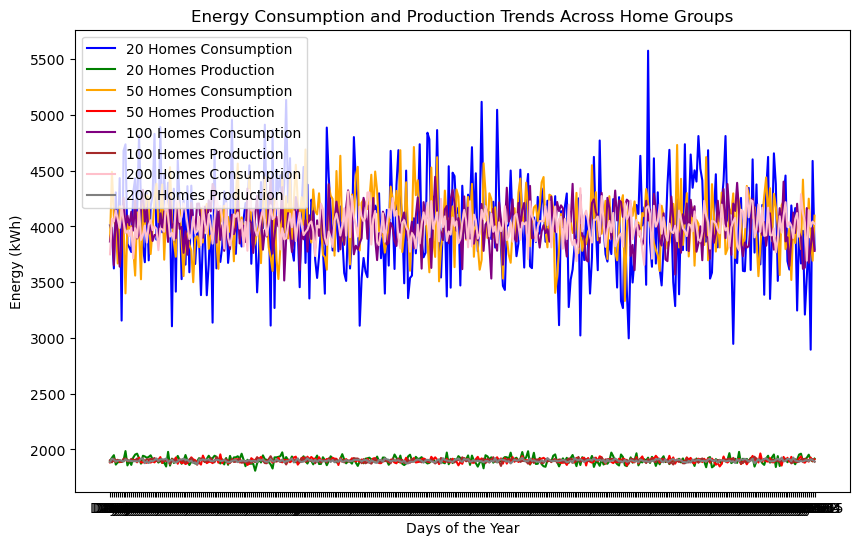

In [121]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(mean_consumption_20, label='20 Homes Consumption', color='blue')
plt.plot(mean_production_20, label='20 Homes Production', color='green')

plt.plot(mean_consumption_50, label='50 Homes Consumption', color='orange')
plt.plot(mean_production_50, label='50 Homes Production', color='red')

plt.plot(mean_consumption_100, label='100 Homes Consumption', color='purple')
plt.plot(mean_production_100, label='100 Homes Production', color='brown')

plt.plot(mean_consumption_200, label='200 Homes Consumption', color='pink')
plt.plot(mean_production_200, label='200 Homes Production', color='gray')

plt.xlabel('Days of the Year')
plt.ylabel('Energy (kWh)')
plt.title('Energy Consumption and Production Trends Across Home Groups')
plt.legend()
plt.show()


In [122]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Prepare the dataset for modeling (for example using the 100-home dataset)
X = consumption_100.iloc[:, :-1]  # Features: all days except the last one
y = consumption_100.iloc[:, -1]   # Target: the last day

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


Mean Absolute Error (MAE): 1469.9147988827074
Root Mean Squared Error (RMSE): 1687.8429859598366


In [123]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid to search for the best parameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Best parameters
best_model = grid_search.best_estimator_
y_pred_optimized = best_model.predict(X_test)

# Evaluate the optimized model
optimized_rmse = mean_squared_error(y_test, y_pred_optimized, squared=False)
print(f'Optimized RMSE: {optimized_rmse}')


Optimized RMSE: 1687.5740564091857


In [124]:
# !pip install xgboost



In [125]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.01, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
print(f'Mean Absolute Error (XGBoost): {mae_xgb}')
print(f'Root Mean Squared Error (XGBoost): {rmse_xgb}')


Mean Absolute Error (XGBoost): 1879.1327071418157
Root Mean Squared Error (XGBoost): 2093.2124186664605


In [126]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Scaling the data (separately scale X and y)
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X_train)
y_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))

# Reshaping the X for LSTM input (samples, timesteps, features)
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_scaled.shape[1], X_scaled.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_scaled, y_scaled, epochs=50, batch_size=32, verbose=1)

# Preparing the test data
X_test_scaled = scaler_X.transform(X_test)
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Predicting on test data
y_pred_lstm = model.predict(X_test_scaled)

# Rescale predictions back to original scale
y_pred_lstm_rescaled = scaler_y.inverse_transform(y_pred_lstm)

# Evaluate the model
mae_lstm = mean_absolute_error(y_test, y_pred_lstm_rescaled)
rmse_lstm = mean_squared_error(y_test, y_pred_lstm_rescaled, squared=False)

print(f'Mean Absolute Error (LSTM): {mae_lstm}')
print(f'Root Mean Squared Error (LSTM): {rmse_lstm}')


Epoch 1/50


E:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
Epoch 16/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Epoch 17/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Epoch 18/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Epoch 19/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Epoch 20/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
Epoch 21/50
3/3 ━━━━

In [127]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge

# Define base models
estimators = [
    ('rf', RandomForestRegressor(n_estimators=100)),
    ('xgb', XGBRegressor(n_estimators=100)),
]

# Define the stacking model
stacking_model = StackingRegressor(estimators=estimators, final_estimator=Ridge())

stacking_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_stack = stacking_model.predict(X_test)
mae_stack = mean_absolute_error(y_test, y_pred_stack)
rmse_stack = mean_squared_error(y_test, y_pred_stack, squared=False)
print(f'Mean Absolute Error (Stacked): {mae_stack}')
print(f'Root Mean Squared Error (Stacked): {rmse_stack}')


Mean Absolute Error (Stacked): 1397.4988277791344
Root Mean Squared Error (Stacked): 1697.3782943819851


In [128]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Assuming X is a DataFrame and y is a Series
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Fit and transform the features
X_scaled = scaler_X.fit_transform(X)

# Convert y to a NumPy array and reshape it
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)


In [129]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train.ravel())

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)


In [130]:
from xgboost import XGBRegressor

# Train XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.01, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train.ravel())

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)


In [131]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Reshape the data for LSTM (samples, timesteps, features)
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(LSTM(50, return_sequences=False))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
lstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, verbose=1)

# Predict on the test set
y_pred_lstm = lstm_model.predict(X_test_lstm)


Epoch 1/50


E:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Epoch 16/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Epoch 17/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 18/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Epoch 19/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Epoch 20/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Epoch 21/50
3/3 ━━━━━

In [132]:
import numpy as np

# Rescale predictions back to original values using the scaler
y_pred_rf_rescaled = scaler_y.inverse_transform(y_pred_rf.reshape(-1, 1))
y_pred_xgb_rescaled = scaler_y.inverse_transform(y_pred_xgb.reshape(-1, 1))
y_pred_lstm_rescaled = scaler_y.inverse_transform(y_pred_lstm)

# Ensemble by averaging the predictions
y_pred_ensemble = (y_pred_rf_rescaled + y_pred_xgb_rescaled + y_pred_lstm_rescaled) / 3

# You can also try weighted averaging if one model performs better than others
# weights = [0.3, 0.4, 0.3]  # Assign different weights to each model based on performance
# y_pred_ensemble = (weights[0] * y_pred_rf_rescaled + weights[1] * y_pred_xgb_rescaled + weights[2] * y_pred_lstm_rescaled)


In [133]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Evaluate ensemble predictions
mae_ensemble = mean_absolute_error(y_test, y_pred_ensemble)
rmse_ensemble = mean_squared_error(y_test, y_pred_ensemble, squared=False)

print(f'Mean Absolute Error (Ensemble): {mae_ensemble}')
print(f'Root Mean Squared Error (Ensemble): {rmse_ensemble}')


Mean Absolute Error (Ensemble): 3908.834114644161
Root Mean Squared Error (Ensemble): 3957.7397000069363


In [134]:
import numpy as np

def predict_future_days(X_last_day, num_days, models):
    future_predictions = []
    
    # Ensure X_last_day is 2D if it's 1D
    if X_last_day.ndim == 1:
        X_last_day = X_last_day.reshape(1, -1)

    X_input = X_last_day.reshape(1, 1, -1)  # Reshape for LSTM input

    for _ in range(num_days):
        # Get predictions from each model
        y_pred_rf = models['rf'].predict(X_last_day)
        y_pred_xgb = models['xgb'].predict(X_last_day)
        y_pred_lstm = models['lstm'].predict(X_input)

        # Rescale the predictions back to original scale
        y_pred_rf_rescaled = scaler_y.inverse_transform(y_pred_rf.reshape(-1, 1))
        y_pred_xgb_rescaled = scaler_y.inverse_transform(y_pred_xgb.reshape(-1, 1))
        y_pred_lstm_rescaled = scaler_y.inverse_transform(y_pred_lstm)

        # Ensemble the predictions
        y_pred_ensemble = (y_pred_rf_rescaled + y_pred_xgb_rescaled + y_pred_lstm_rescaled) / 3
        future_predictions.append(y_pred_ensemble[0][0])

        # Update X_last_day for the next step
        # Use np.concatenate to append the new predicted value and drop the first value
        X_last_day = np.concatenate([X_last_day[:, 1:], y_pred_ensemble.T], axis=1)
        X_input = X_last_day.reshape(1, 1, -1)

    return future_predictions

# Example usage:
# Define models dictionary
models = {'rf': rf_model, 'xgb': xgb_model, 'lstm': lstm_model}

# Predict future values for 7 days using the last day of X_test as the starting point
future_predictions = predict_future_days(X_test[-1], 7, models)
print(f'Future Predictions: {future_predictions}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Future Predictions: [5244.275294571094, 2207.6464680848526, 3635.867286691515, 2211.3987388785813, 3069.2565196234777, 2492.9455603283427, 2920.038462825036]


In [135]:
# import matplotlib.pyplot as plt

# # Plotting the actual vs predicted values
# def plot_predictions(actual, predicted, future_pred=None, future_days=None):
#     plt.figure(figsize=(10, 6))
    
#     # Plot actual vs predicted values for test set
#     plt.plot(range(len(actual)), actual, label='Actual Values', marker='o')
#     plt.plot(range(len(predicted)), predicted, label='Predicted Values', marker='x')

#     # Optionally plot future predictions
#     if future_pred is not None:
#         future_range = range(len(actual), len(actual) + future_days)
#         plt.plot(future_range, future_pred, label='Future Predictions', marker='s')
    
#     plt.title('Actual vs Predicted Energy Consumption')
#     plt.xlabel('Time Steps (Days)')
#     plt.ylabel('Energy Consumption')
#     plt.legend()
#     plt.grid(True)
#     plt.show()

# # Example usage for test set predictions:
# y_test_rescaled = scaler_y.inverse_transform(y_test)  # Rescale y_test to original values
# y_pred_rescaled = scaler_y.inverse_transform(y_pred_ensemble)  # Rescale the ensemble predictions

# # Optionally use future_predictions if predicting future days
# plot_predictions(y_test_rescaled, y_pred_rescaled, future_pred=future_predictions, future_days=7)


In [136]:
# import pandas as pd
# import numpy as np

# # Create a pandas DataFrame to display actual vs predicted values
# def create_prediction_table(actual, predicted, future_pred=None, future_days=None):
#     data = {
#         'Actual Values': actual.flatten(),
#         'Predicted Values': predicted.flatten()
#     }
    
#     df = pd.DataFrame(data)
    
#     # Optionally add future predictions to the table
#     if future_pred is not None:
#         future_pred = np.array(future_pred)  # Convert future_pred to NumPy array
#         future_data = {
#             'Future Predictions': future_pred.flatten()  # Now it can be flattened
#         }
#         future_df = pd.DataFrame(future_data, index=[f'Day +{i+1}' for i in range(future_days)])
        
#         # Use pd.concat() instead of append()
#         df = pd.concat([df, future_df], axis=0)
    
#     return df

# # Example usage:
# # Create the prediction table
# prediction_table = create_prediction_table(y_test_rescaled, y_pred_rescaled, future_pred=future_predictions, future_days=7)

# # Display the table
# print(prediction_table)


In [137]:
# Correct rescaling example
y_pred_rescaled = scaler_y.inverse_transform(y_pred_ensemble)
y_test_rescaled = scaler_y.inverse_transform(y_test)


In [138]:
from sklearn.preprocessing import MinMaxScaler

# Initialize scalers
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Fit the scaler on the features and target
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Important: Fit the scaler on y_train, and then transform both y_train and y_test
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

# Model training and prediction here...
# After getting predictions, rescale the predictions back
y_pred_rescaled = scaler_y.inverse_transform(y_pred_ensemble)
y_test_rescaled = scaler_y.inverse_transform(y_test)


In [139]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [140]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

xgb_model = XGBRegressor(random_state=42)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train_scaled.ravel())

best_model = grid_search.best_estimator_


In [141]:
# Convert y_test from pandas Series to NumPy array and reshape it to a 2D array
y_test_reshaped = y_test.values.reshape(-1, 1)

# Rescale predictions and test data back to their original scale
y_pred_rescaled = scaler_y.inverse_transform(y_pred_ensemble)
y_test_rescaled = scaler_y.inverse_transform(y_test_reshaped)

# Calculate MAE and RMSE
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
rmse = mean_squared_error(y_test_rescaled, y_pred_rescaled, squared=False)

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')


Mean Absolute Error: 1479.4144233996608
Root Mean Squared Error: 1744.2014977087226


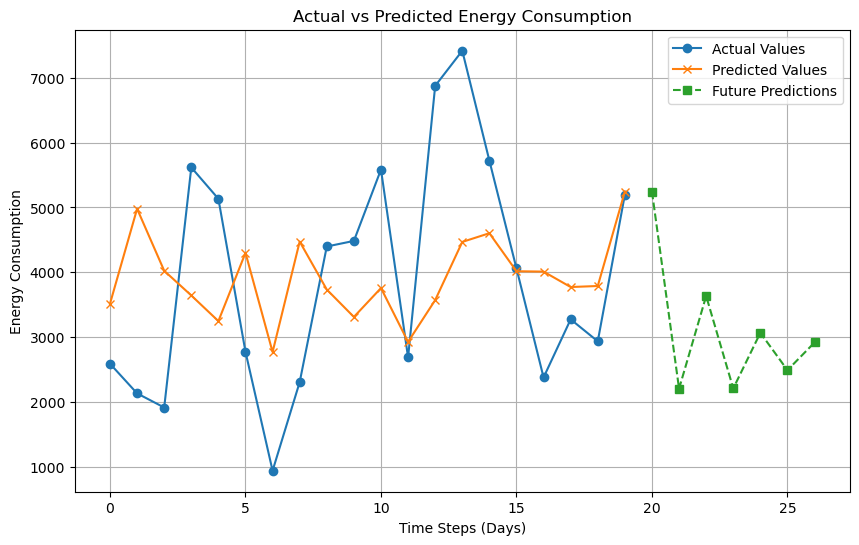

In [142]:
import matplotlib.pyplot as plt

def plot_predictions(actual, predicted, future_pred=None, future_days=None):
    plt.figure(figsize=(10, 6))
    
    # Plot actual and predicted values
    plt.plot(range(len(actual)), actual, label='Actual Values', marker='o')
    plt.plot(range(len(predicted)), predicted, label='Predicted Values', marker='x')

    # Optionally plot future predictions if provided
    if future_pred is not None:
        future_range = range(len(actual), len(actual) + future_days)
        plt.plot(future_range, future_pred, label='Future Predictions', marker='s', linestyle='--')
    
    plt.title('Actual vs Predicted Energy Consumption')
    plt.xlabel('Time Steps (Days)')
    plt.ylabel('Energy Consumption')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage for test set predictions:
y_test_rescaled = scaler_y.inverse_transform(y_test.values.reshape(-1, 1))  # Rescale y_test to original values
y_pred_rescaled = scaler_y.inverse_transform(y_pred_ensemble)  # Rescale the ensemble predictions

# If you have future predictions (e.g., future_predictions), include them
plot_predictions(y_test_rescaled, y_pred_rescaled, future_pred=future_predictions, future_days=7)


In [143]:
import pandas as pd
import numpy as np

def create_prediction_table(actual, predicted, future_pred=None, future_days=None):
    # Create DataFrame for actual and predicted values
    data = {
        'Actual Values': actual.flatten(),
        'Predicted Values': predicted.flatten()
    }
    df = pd.DataFrame(data)
    
    # Optionally add future predictions to the table
    if future_pred is not None:
        future_pred = np.array(future_pred)  # Ensure it's a NumPy array
        future_data = {
            'Future Predictions': future_pred.flatten()
        }
        future_df = pd.DataFrame(future_data, index=[f'Day +{i+1}' for i in range(future_days)])
        
        # Concatenate future predictions to the original DataFrame
        df = pd.concat([df, future_df], axis=0)
    
    return df

# Create the prediction table
prediction_table = create_prediction_table(y_test_rescaled, y_pred_rescaled, future_pred=future_predictions, future_days=7)

# Display the table
print(prediction_table)


        Actual Values  Predicted Values  Future Predictions
0         2592.550904       3517.988362                 NaN
1         2135.769044       4979.577385                 NaN
2         1917.993434       4024.822152                 NaN
3         5616.770801       3644.170307                 NaN
4         5133.442953       3249.468189                 NaN
5         2775.835141       4301.012782                 NaN
6          944.137570       2772.905303                 NaN
7         2309.496275       4474.175133                 NaN
8         4398.642032       3735.360119                 NaN
9         4484.689702       3313.202494                 NaN
10        5583.916135       3758.493335                 NaN
11        2689.171506       2929.285996                 NaN
12        6873.760011       3572.781109                 NaN
13        7414.892714       4469.015086                 NaN
14        5721.605179       4603.190807                 NaN
15        4061.129444       4017.475170 